# Группировка данных в DataFrame

✍ Одна из основных задач анализа данных — это группировка данных и сравнение показателей в группах. Например, нам необходимо сравнить средний уровень заработной платы в зависимости от пола/уровня образования. Или же мы хотим проследить, какая группа клиентов приносит нам наибольший доход, чтобы направить своё внимание на эту группу.

В некоторых случаях группировки может быть достаточно, чтобы ответить на вопросы бизнеса. В других случаях это может стать первым шагом в более сложном анализе. Так, например, благодаря группировке мы можем выявлять признаки, которые не несут статистической значимости, или признаки, которые вносят наибольший вклад. 

Так или иначе, владение группировкой — важный навык, который открывает новые возможности по работе с данными.

## Метод groupby()

В библиотеке Pandas для группировки данных по одному или нескольким признакам можно использовать метод groupby().

Основные параметры метода groupby()

by — имя или список имён столбцов, по которым производится группировка.\
axis — ось, по которой производится группировка (0 — строки, 1 — столбцы). По умолчанию группировка производится по строкам.\
as_index — добавляется ли дополнительный индекс к таблице. По умолчанию установлен на True.

Метод groupby() возвращает объект DataFrameGroupBy, который хранит в себе информацию о том, какие строки относятся к определённой группе, и сам по себе не представляет для нас интереса. 

Однако к этому объекту можно применять уже знакомые нам агрегирующие методы (mean, median, sum и т. д.), чтобы рассчитывать показатели внутри каждой группы.

Посмотрим на общую схему работы метода groupby() в Pandas:

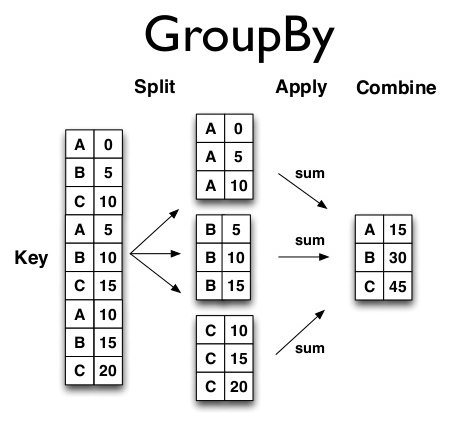

Сначала мы разделяем данные на группы с помощью метода groupby(), после чего к каждой группе применяем агрегацию и объединяем результаты в новую таблицу.

***Группировка данных по одному критерию с одной агрегацией***

Рассмотрим группировку данных на примере нашей таблицы с недвижимостью.

In [4]:
import pandas as pd

melb_df = pd.read_csv('data/melb_data_fe.csv')
melb_df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType,Weekend
0,Abbotsford,2,house,1480000.0,S,Biggin,2016-03-12,2.5,3067,2,...,144.9984,Northern Metropolitan,4019,25.20,-0.231707,3,46,5,St,1
1,Abbotsford,2,house,1035000.0,S,Biggin,2016-04-02,2.5,3067,2,...,144.9934,Northern Metropolitan,4019,15.80,-0.327660,4,116,5,St,1
2,Abbotsford,3,house,1465000.0,SP,Biggin,2017-04-03,2.5,3067,3,...,144.9944,Northern Metropolitan,4019,18.75,0.056338,4,117,0,St,0
3,Abbotsford,3,house,850000.0,PI,Biggin,2017-04-03,2.5,3067,3,...,144.9969,Northern Metropolitan,4019,15.75,0.145455,4,47,0,other,0
4,Abbotsford,4,house,1600000.0,VB,Nelson,2016-04-06,2.5,3067,3,...,144.9941,Northern Metropolitan,4019,17.75,0.083969,4,2,2,St,0


In [5]:
# Применим агрегирующую функцию среднего к результату работы groupby(). В качестве столбца для группировки возьмём столбец типа объекта недвижимости (Type):

melb_df.groupby(by='Type').mean(numeric_only=True)

,Rooms,Price,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,Weekend
Type,,,,,,,,,,,,,,,,,,
house,3.260874,1.242665e+06,10.979479,3104.080643,3.229336,1.613822,1.772674,617.181924,152.162553,-37.803795,144.994700,7259.025505,18.996731,-0.490031,6.750873,55.669700,4.015769,0.689808
townhouse,2.837522,9.337351e+05,9.851346,3100.777379,2.814183,1.809695,1.555655,279.606822,134.649710,-37.815782,144.996489,7094.459605,18.569847,-0.094916,6.621185,26.690305,3.980251,0.681329
unit,1.963871,6.051275e+05,7.607391,3110.797481,1.966523,1.183295,1.128936,477.314219,102.235863,-37.823710,144.996363,8199.280080,21.068242,0.319883,6.578721,39.703016,3.817368,0.646006


Мы получили таблицу, на пересечении строк и столбцов которой находятся средние значения каждого числового признака в наших данных.

Обратите внимание на структуру получившейся таблицы: теперь на месте индексов стоят значения типа объекта недвижимости Type (house, townhouse, unit).

Примечание. Если мы хотим видеть тип объекта в качестве отдельного столбца таблицы, мы можем выставить параметр as_index на False:

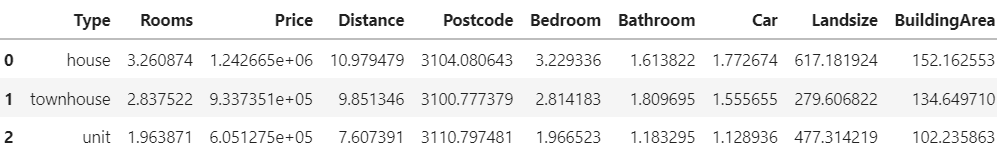

In [6]:
# Как правило, нам не нужна информация обо всех столбцах, поэтому агрегирующие методы можно применять только к интересующему нас столбцу. Например, давайте сравним средние цены на объекты в зависимости от их типа:

melb_df.groupby('Type')['Price'].mean()

Type
house        1.242665e+06
townhouse    9.337351e+05
unit         6.051275e+05
Name: Price, dtype: float64

Примечание. Обратите внимание, что, так как мы считаем только один показатель (среднее) для одного столбца, в результате мы получаем объект Series.

Из этой маленькой таблицы видно, что наибольшей средней ценой обладают объекты типа house (дома, коттеджи, виллы). Следовательно, можно сделать вывод, что тип постройки является значимым фактором при определении цены объекта недвижимости.

Теперь давайте выясним, какие регионы (Regionname) наиболее удалены от центра Мельбурна.

In [7]:
# Для этого найдём минимальное значение расстояния от центра города до объекта в зависимости от его региона. Результат отсортируем по убыванию расстояния:

melb_df.groupby('Regionname')['Distance'].min().sort_values(ascending=False)

Regionname
Western Victoria              29.8
Eastern Victoria              25.2
Northern Victoria             21.8
South-Eastern Metropolitan    14.7
Eastern Metropolitan           7.8
Western Metropolitan           4.3
Southern Metropolitan          0.7
Northern Metropolitan          0.0
Name: Distance, dtype: float64

Итак, наиболее удалёнными являются все регионы Victoria.

***Группировка данных по одному критерию с несколькими агрегациями***

Чтобы рассчитать несколько агрегирующих методов, можно воспользоваться методом agg(), который принимает список строк с названиями агрегаций.

In [8]:
# Давайте построим таблицу для анализа продаж по месяцам. Для этого найдём количество продаж, а также среднее и максимальное значения цен объектов недвижимости (Price), сгруппированных по номеру месяца продажи (MonthSale). Результат отсортируем по количеству продаж в порядке убывания:

melb_df.groupby('MonthSale')['Price'].agg(
        ['count', 'mean', 'max']
    ).sort_values(by='count', ascending=False)

,count,mean,max
MonthSale,,,
8,1850,1.056371e+06,6500000.0
7,1835,9.314698e+05,9000000.0
5,1644,1.097807e+06,8000000.0
6,1469,1.068981e+06,7650000.0
3,1408,1.146762e+06,5600000.0
4,1246,1.050479e+06,5500000.0
9,1188,1.126349e+06,6400000.0
10,854,1.135970e+06,6250000.0
11,750,1.142503e+06,5050000.0


Примечание. Обратите внимание, что, так как мы считаем несколько показателей для одного столбца, в результате мы получаем объект DataFrame.

В результате применения метода agg(), в который мы передали список с названиями интересующих нас агрегирующих функций, мы получаем DataFrame со столбцами count, mean и max, где для каждого месяца рассчитаны соответствующие параметры. Результат сортируем по столбцу count.

?
Какие интересные выводы можно сделать из этой таблицы?

1
Пик продаж приходится на период весна-лето.

2
Средняя цена продаваемых объектов относительно стабильна и находится в пределах 1 млн. австралийских долларов с небольшими отклонениями (около 100 тыс. влево и вправо).

3
Прослеживается некоторая зависимость между сезоном и максимальной ценой объектов: в месяцы с большим спросом на объекты недвижимости цена также имеет наибольшие показатели. Можно сделать предположение, что это связано с повышением цен на элитные дома в периоды большого спроса.

In [9]:
# Примечание. Если вам нужна полная информация обо всех основных статистических характеристиках внутри каждой группы, вы можете воспользоваться методом agg(), передав в качестве его параметра строку 'describe':

melb_df.groupby('MonthSale')['Price'].agg('describe')

,count,mean,std,min,25%,50%,75%,max
MonthSale,,,,,,,,
1,278.0,9.397921e+05,577668.924214,170000.0,570500.0,795000.0,1111250.0,5200000.0
2,333.0,1.169051e+06,671564.357417,131000.0,710000.0,1020000.0,1478000.0,4735000.0
3,1408.0,1.146762e+06,709573.596867,85000.0,680000.0,945000.0,1400000.0,5600000.0
4,1246.0,1.050479e+06,591892.902979,145000.0,655000.0,905500.0,1298750.0,5500000.0
5,1644.0,1.097807e+06,668492.867996,145000.0,650000.0,905000.0,1371250.0,8000000.0
6,1469.0,1.068981e+06,606010.069052,222000.0,660000.0,900000.0,1325000.0,7650000.0
7,1835.0,9.314698e+05,537390.803161,190000.0,586750.0,800000.0,1150000.0,9000000.0
8,1850.0,1.056371e+06,619617.476541,160000.0,635000.0,892000.0,1310000.0,6500000.0
9,1188.0,1.126349e+06,608734.690742,170000.0,725000.0,980000.0,1360000.0,6400000.0


После базовых математических функций наиболее частым агрегированием является подсчёт числа уникальных значений. Так, например, мы можем вычислить число уникальных риелторских компаний в зависимости от региона, чтобы понять, в каких регионах конкуренция на рынке недвижимости меньше. Это можно сделать, передав в параметр метода agg() строку 'nunique'. 

In [10]:
# Более того, метод agg() поддерживает использование и других функций. Передадим дополнительно встроенную функцию set, чтобы получить множество из агентств недвижимости, которые работают в каждом из регионов:

melb_df.groupby('Regionname')['SellerG'].agg(
                ['nunique', set]
    )
    

,nunique,set
Regionname,,
Eastern Metropolitan,26,"{Marshall, Buckingham, Jellis, Love, RT, RW, G..."
Eastern Victoria,11,"{O'Brien, McGrath, C21, Barry, Eview, Fletcher..."
Northern Metropolitan,40,"{Marshall, Nick, Rendina, Buckingham, McDonald..."
Northern Victoria,11,"{YPA, McGrath, Buckingham, McDonald, Barry, Ra..."
South-Eastern Metropolitan,25,"{Chisholm, Jellis, RW, Gary, Hodges, Greg, Evi..."
Southern Metropolitan,38,"{Marshall, Nick, Williams, Rendina, Chisholm, ..."
Western Metropolitan,34,"{Williams, Rendina, Chisholm, McDonald, Jellis..."
Western Victoria,6,"{YPA, Raine, HAR, hockingstuart, other, Ray}"


Как и ожидалось, наименьшая конкуренция в наиболее удалённом регионе Western Victoria, а наибольшая — в центральном районе Northern Metropolitan.

✍ Методы группировки по одному признаку позволяют посмотреть на наши данные «в разрезе» группирующего признака и понять их взаимосвязь.

In [11]:
# Шаг 1: Группировка по количеству комнат и вычисление средней цены для каждой группы
grouped_df = melb_df.groupby('Rooms')['Price'].mean()

# Шаг 2: Находим максимальную среднюю цену
max_avg_price = grouped_df.max()

# Шаг 3: Находим количество комнат, для которых средняя цена наибольшая
room_with_max_avg_price = grouped_df[grouped_df == max_avg_price].index[0]

# Выводим результат
print(f"Количество комнат с наибольшей средней ценой: {room_with_max_avg_price}")

Количество комнат с наибольшей средней ценой: 7


In [12]:
# Шаг 1: Группировка по региону и вычисление стандартного отклонения по широте
std_devs = melb_df.groupby('Regionname')['Lattitude'].std()

# Шаг 2: Находим регион с наименьшим стандартным отклонением
region_with_min_std = std_devs.idxmin()

# Выводим результат
print(f"Регион с наименьшим стандартным отклонением по географической широте: {region_with_min_std}")

Регион с наименьшим стандартным отклонением по географической широте: Western Victoria


In [13]:
# Шаг 1: Преобразование столбца Date в формат datetime
melb_df['Date'] = pd.to_datetime(melb_df['Date'])

# Шаг 2: Фильтрация данных по заданному диапазону дат
filtered_df = melb_df[(melb_df['Date'] >= '2017-05-01') & (melb_df['Date'] <= '2017-09-01')]

# Шаг 3: Группировка по риелторской компании и расчёт суммы продаж
seller_revenue = filtered_df.groupby('SellerG')['Price'].sum()

# Шаг 4: Нахождение компании с наименьшей выручкой
seller_with_min_revenue = seller_revenue.idxmin()

# Вывод результата
print(f"Риелторская компания с наименьшей выручкой: {seller_with_min_revenue}")

Риелторская компания с наименьшей выручкой: LITTLE
